# 1. Project description

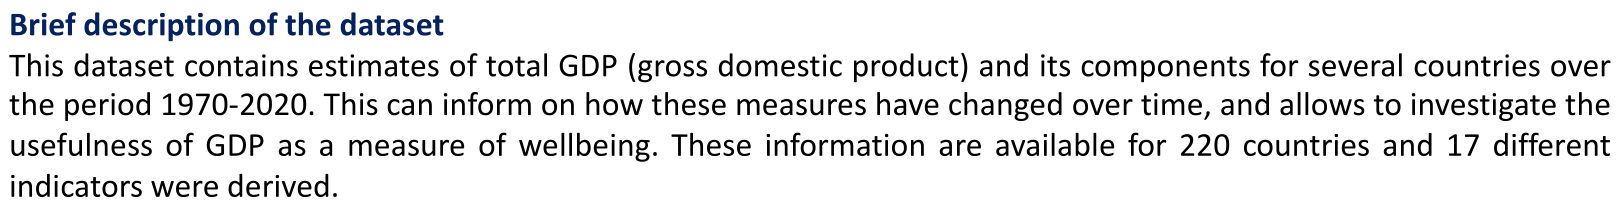

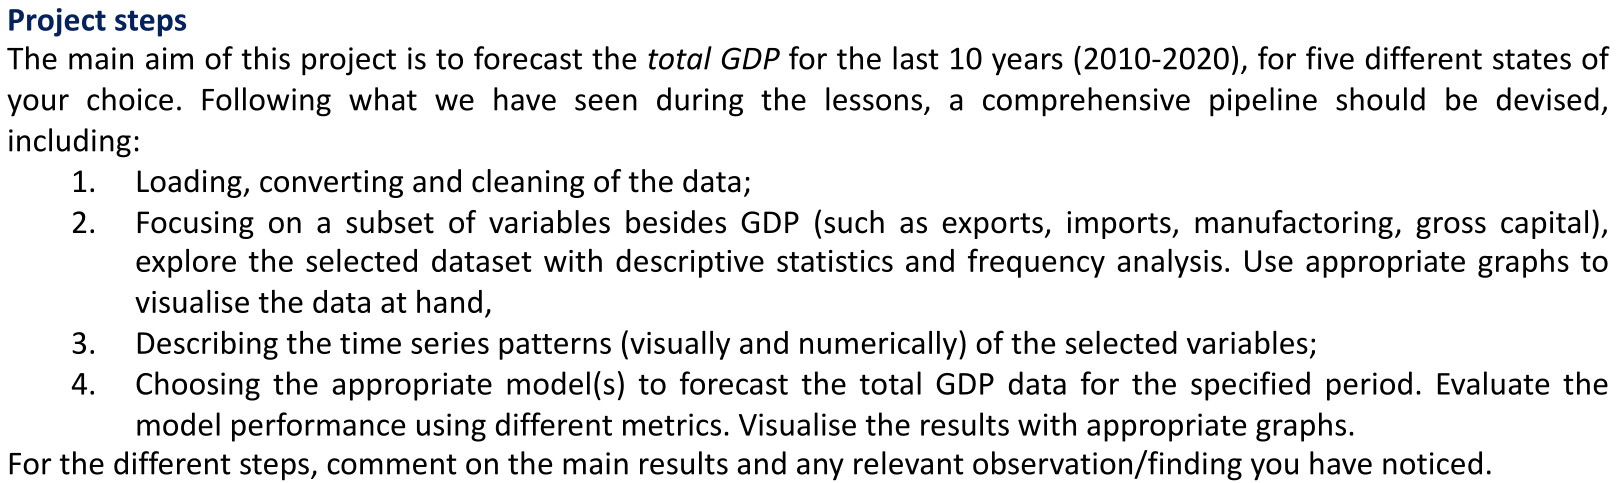

# 2. Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from numpy.fft import fft
import functions as f
from cycler import cycler
import warnings
warnings.filterwarnings("ignore")

# Set default display parameters
#plt.rcParams['figure.figsize'] = [8, 6]
#plt.rcParams['figure.dpi'] = 140
#plt.rcParams['axes.prop_cycle'] = cycler(color=['#7180AC', '#6A605C', 'b', 'y'])
#plt.rcParams['lines.linewidth'] = 2.5
#plt.rcParams['axes.facecolor'] = 'black'

# 3. Create dataframes

In [2]:
df_iniziale = pd.read_csv('GDPconstant-USD-countries.csv', index_col = 'CountryID')

df, valid_nations = f.preprocess_df(df_iniziale)

In [3]:
df.head(3)

,Country,IndicatorName,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CountryID,,,,,,,,,,,,,,,,,,,,,
8,Albania,Final consumption expenditure,2.035896e+09,2.117670e+09,2.202717e+09,2.290083e+09,2.383229e+09,2.478907e+09,2.573526e+09,2.686010e+09,...,9.829417e+09,9.841766e+09,1.003528e+10,1.036170e+10,1.045381e+10,1.070931e+10,1.098068e+10,1.129870e+10,1.165178e+10,1.142641e+10
8,Albania,Household consumption expenditure (including N...,1.952117e+09,2.030508e+09,2.112067e+09,2.195867e+09,2.285082e+09,2.376931e+09,2.467748e+09,2.575058e+09,...,8.662830e+09,8.673986e+09,8.833231e+09,9.081697e+09,9.188655e+09,9.383914e+09,9.613148e+09,9.922240e+09,1.023528e+10,1.002502e+10
8,Albania,General government final consumption expenditure,8.830853e+07,9.187170e+07,9.554977e+07,9.931108e+07,1.034472e+08,1.074913e+08,1.115066e+08,1.169159e+08,...,1.167228e+09,1.168429e+09,1.202395e+09,1.279283e+09,1.265160e+09,1.324583e+09,1.366461e+09,1.376212e+09,1.416324e+09,1.400874e+09


In [4]:
nation_list = f.create_nation_list(valid_nations, df)
nation_list

['Finland', 'Argentina', 'Belgium', 'Canada', 'South Africa']

Default target countries = Finland, Argentina, Belgium, Canada, South Africa

Default target variables = Import, Export, Manufacturing, Gross Capital

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 8 to 716
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1921 non-null   object 
 1   IndicatorName  1921 non-null   object 
 2   1970           1921 non-null   float64
 3   1971           1921 non-null   float64
 4   1972           1921 non-null   float64
 5   1973           1921 non-null   float64
 6   1974           1921 non-null   float64
 7   1975           1921 non-null   float64
 8   1976           1921 non-null   float64
 9   1977           1921 non-null   float64
 10  1978           1921 non-null   float64
 11  1979           1921 non-null   float64
 12  1980           1921 non-null   float64
 13  1981           1921 non-null   float64
 14  1982           1921 non-null   float64
 15  1983           1921 non-null   float64
 16  1984           1921 non-null   float64
 17  1985           1921 non-null   float64
 18  1986          

In [6]:
df_1 = df[df['Country'] == nation_list[0]]
df_1 = f.create_df(df_1)
df_2 = df[df['Country'] == nation_list[1]]
df_2 = f.create_df(df_2)
df_3 = df[df['Country'] == nation_list[2]]
df_3 = f.create_df(df_3)
df_4 = df[df['Country'] == nation_list[3]]
df_4 = f.create_df(df_4)
df_5 = df[df['Country'] == nation_list[4]]
df_5 = f.create_df(df_5)

df_list = [df_1, df_2, df_3, df_4, df_5]

In [7]:
for idx, df in enumerate(df_list):
    print(nation_list[idx])
    print(df.info())
    print('----------------------------------------------')

Finland
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1970 to 2020
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB
None
----------------------------------------------
Argentina
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1970 to 2020
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Exports        51 non-null     object
 1   Imports        51 non-null     object
 2   Manufacturing  51 non-null     object
 3   Gross_capital  51 non-null     object
 4   GDP            51 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB
None
---------------------------------------

Change from object type to float type

In [8]:
df_1 = df_1.astype(float)
df_2 = df_2.astype(float)
df_3 = df_3.astype(float)
df_4 = df_4.astype(float)
df_5 = df_5.astype(float)

# 4. Descriptive statistics

In [9]:
for df in df_list:
    display(df.describe())

,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.000000e+01,5.100000e+01
top,1.066242e+10,1.400966e+10,8.941799e+09,3.074888e+10,7.886801e+10
freq,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,4.900000e+01,5.100000e+01,5.100000e+01,5.000000e+01,5.100000e+01
top,1.569482e+10,7.042927e+09,4.501110e+10,4.372695e+10,2.464847e+11
freq,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,5.687864e+10,5.747039e+10,2.290084e+10,3.976281e+10,1.725902e+11
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,8.092115e+10,6.375635e+10,6.596572e+10,7.610953e+10,4.581051e+11
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


,Exports,Imports,Manufacturing,Gross_capital,GDP
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
unique,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
top,3.301551e+10,2.333012e+10,1.327414e+10,2.008736e+10,1.044714e+11
freq,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Check for the variable with the highest correlation with GDP

In [10]:
corr_1 = df_1.corr()
corr_2 = df_2.corr()
corr_3 = df_3.corr()
corr_4 = df_4.corr()
corr_5 = df_5.corr()

corr_list = [corr_1, corr_2, corr_3, corr_4, corr_5]

max_list = []
f.highest_corr_variable(corr_list, max_list, nation_list)

,Highest correlation variable
Finland,Exports
Argentina,Imports
Belgium,Exports
Canada,Imports
South Africa,Manufacturing


# 5. Descriptive plots

## Line-plot 

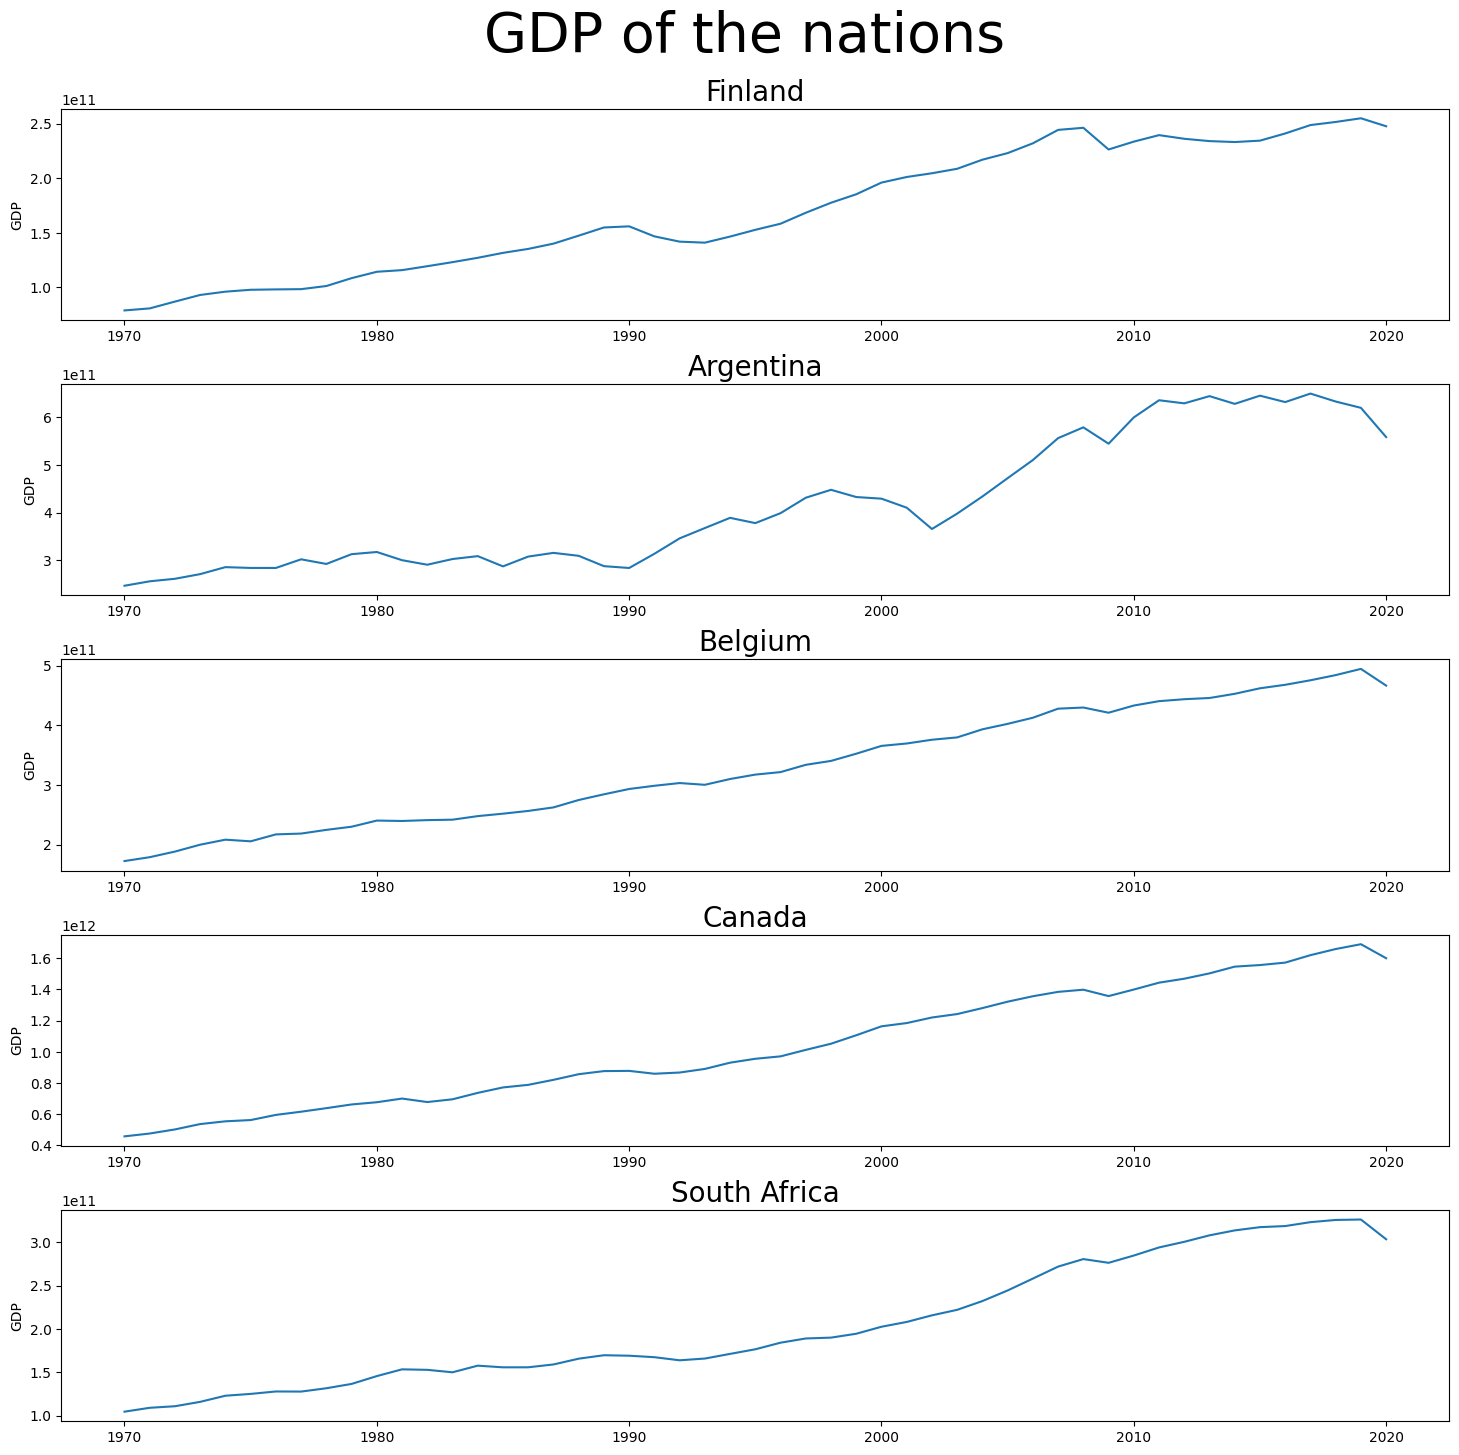

In [11]:
fig, ax = plt.subplots(5, 1, figsize = (15, 15))
plt.suptitle('GDP of the nations', fontsize = 40)
plt.tight_layout(pad = 2.5)

for idx, df in enumerate(df_list):
    sns.lineplot(df['GDP'], ax = ax[idx])
    ax[idx].set_title(nation_list[idx], fontsize = 20)

plt.show()

GDP has similar trend for all the states

## Correlation heatmap

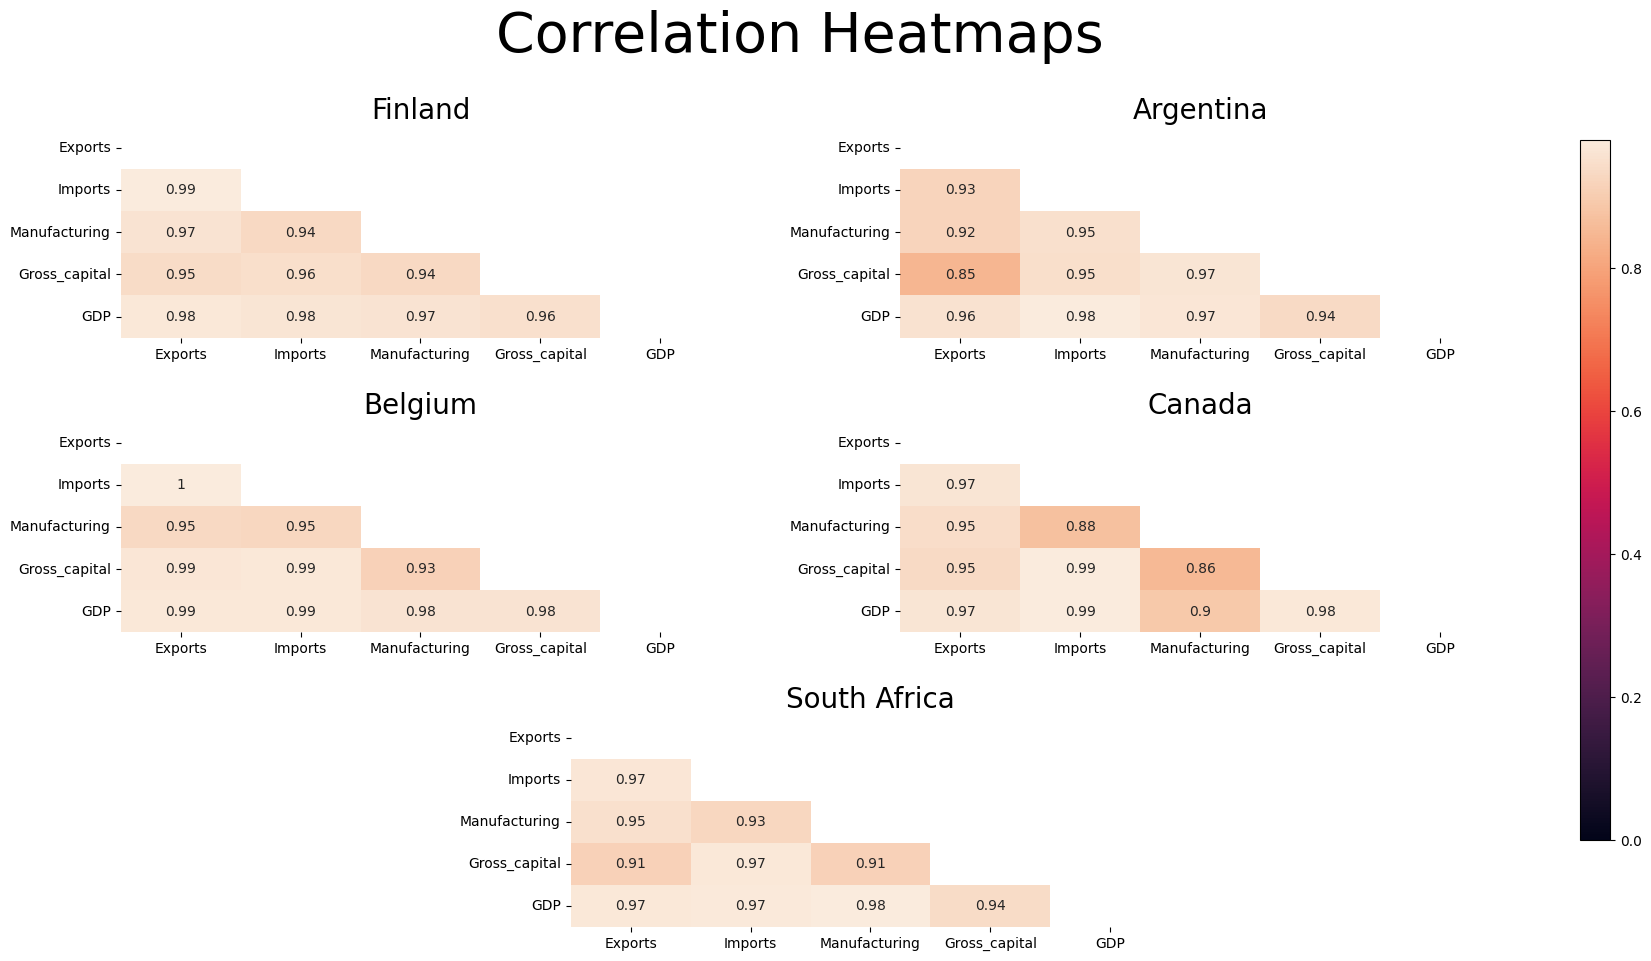

In [12]:
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
plt.suptitle('Correlation Heatmaps', fontsize = 40)
plt.tight_layout(pad = 2.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

matrix = np.triu(corr_1)
sns.heatmap(corr_1,annot = True, ax = ax[0][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_2)
sns.heatmap(corr_2, annot = True, ax = ax[0][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_3)
sns.heatmap(corr_3, annot = True, ax = ax[1][0], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_4)
sns.heatmap(corr_4, annot = True, ax = ax[1][1], vmin = 0, cbar = False, mask = matrix)
matrix = np.triu(corr_5)
sns.heatmap(corr_5, annot = True, ax = ax[2][0], vmin = 0, cbar = False, mask = matrix)
fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.3, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(ax[2][0].collections[0], cax = cbar_ax)

plt.show()

Correlation is high between all the variables in all the states

## Scatterplot 
Visualize the lowest correlation between 2 variables in all the states to prove the previous statement

Tuple of variables for every nation with lowest correlation:


,0,1
Finland,Manufacturing,Gross_capital
Argentina,Exports,Gross_capital
Belgium,Manufacturing,Gross_capital
Canada,Manufacturing,Gross_capital
South Africa,Manufacturing,Gross_capital


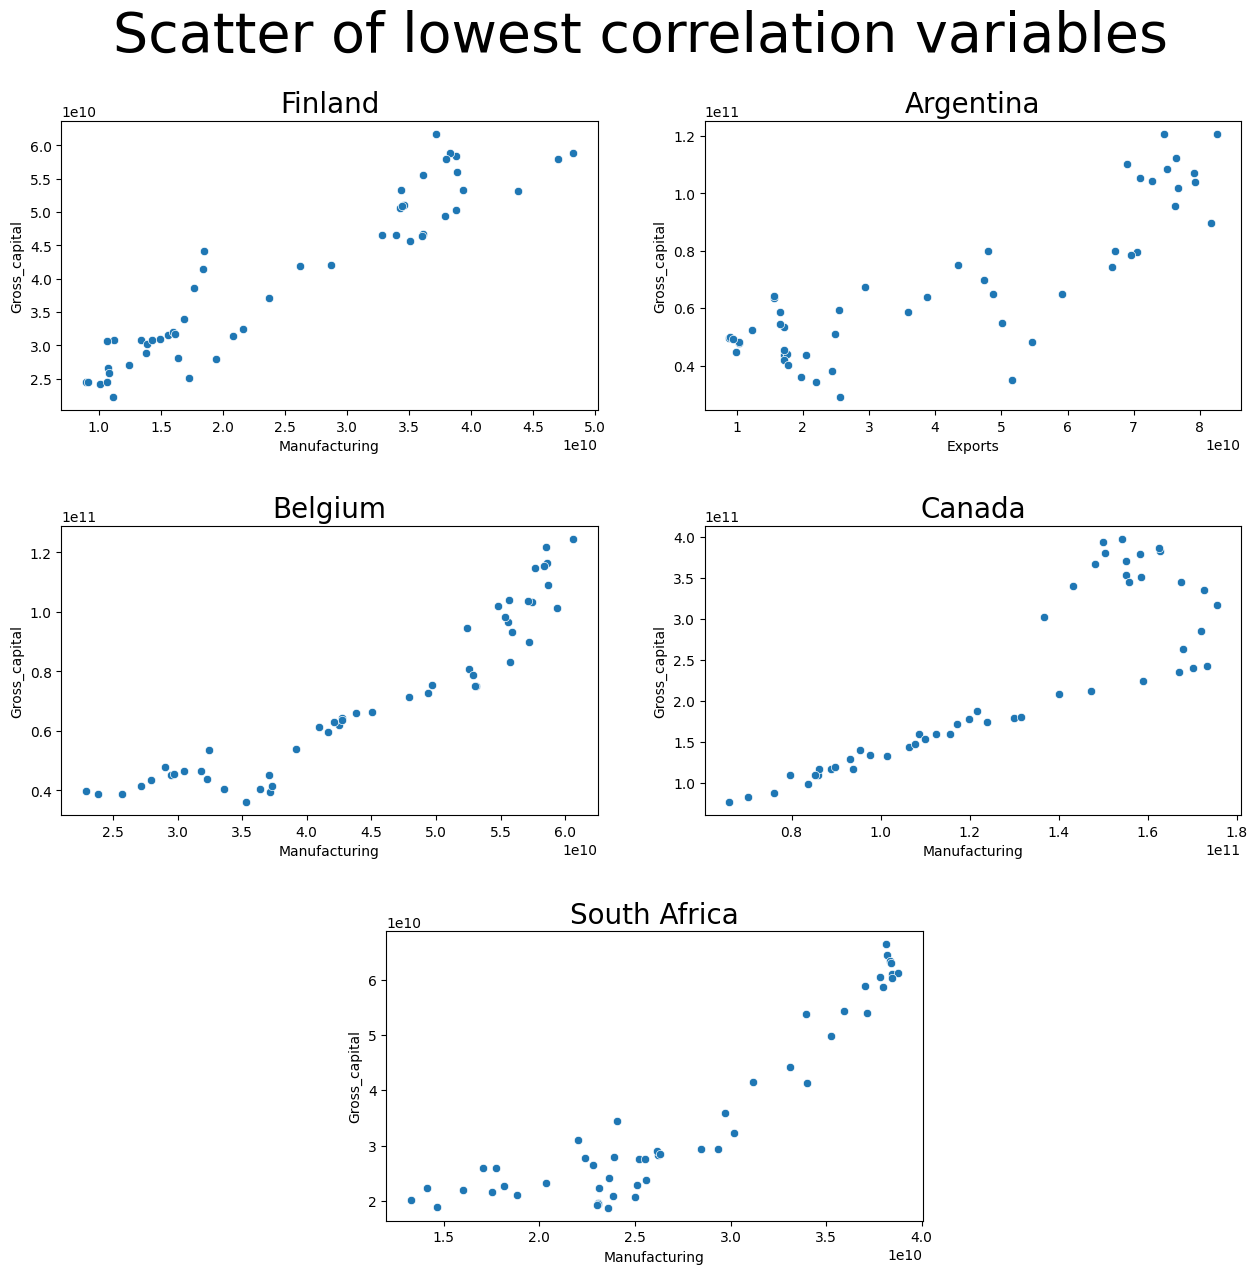

In [13]:
low_corr_list = []

fig, ax = plt.subplots(3, 2, figsize = (13, 13))
plt.suptitle('Scatter of lowest correlation variables', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

idx = f.lowest_corr_variable(corr_1)
low_corr_list.append(idx)
sns.scatterplot(x = df_1[idx[0]], y = df_1[idx[1]], ax = ax[0][0])
idx = f.lowest_corr_variable(corr_2)
low_corr_list.append(idx)
sns.scatterplot(x = df_2[idx[0]], y = df_2[idx[1]], ax = ax[0][1])
idx = f.lowest_corr_variable(corr_3)
low_corr_list.append(idx)
sns.scatterplot(x = df_3[idx[0]], y = df_3[idx[1]], ax = ax[1][0])
idx = f.lowest_corr_variable(corr_4)
low_corr_list.append(idx)
sns.scatterplot(x = df_4[idx[0]], y = df_4[idx[1]], ax = ax[1][1])
idx = f.lowest_corr_variable(corr_5)
low_corr_list.append(idx)
sns.scatterplot(x = df_5[idx[0]], y = df_5[idx[1]], ax = ax[2][0])
fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.25, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)

print('Tuple of variables for every nation with lowest correlation:')
display(pd.DataFrame(low_corr_list, index = nation_list))

plt.show()

## Lag-plot

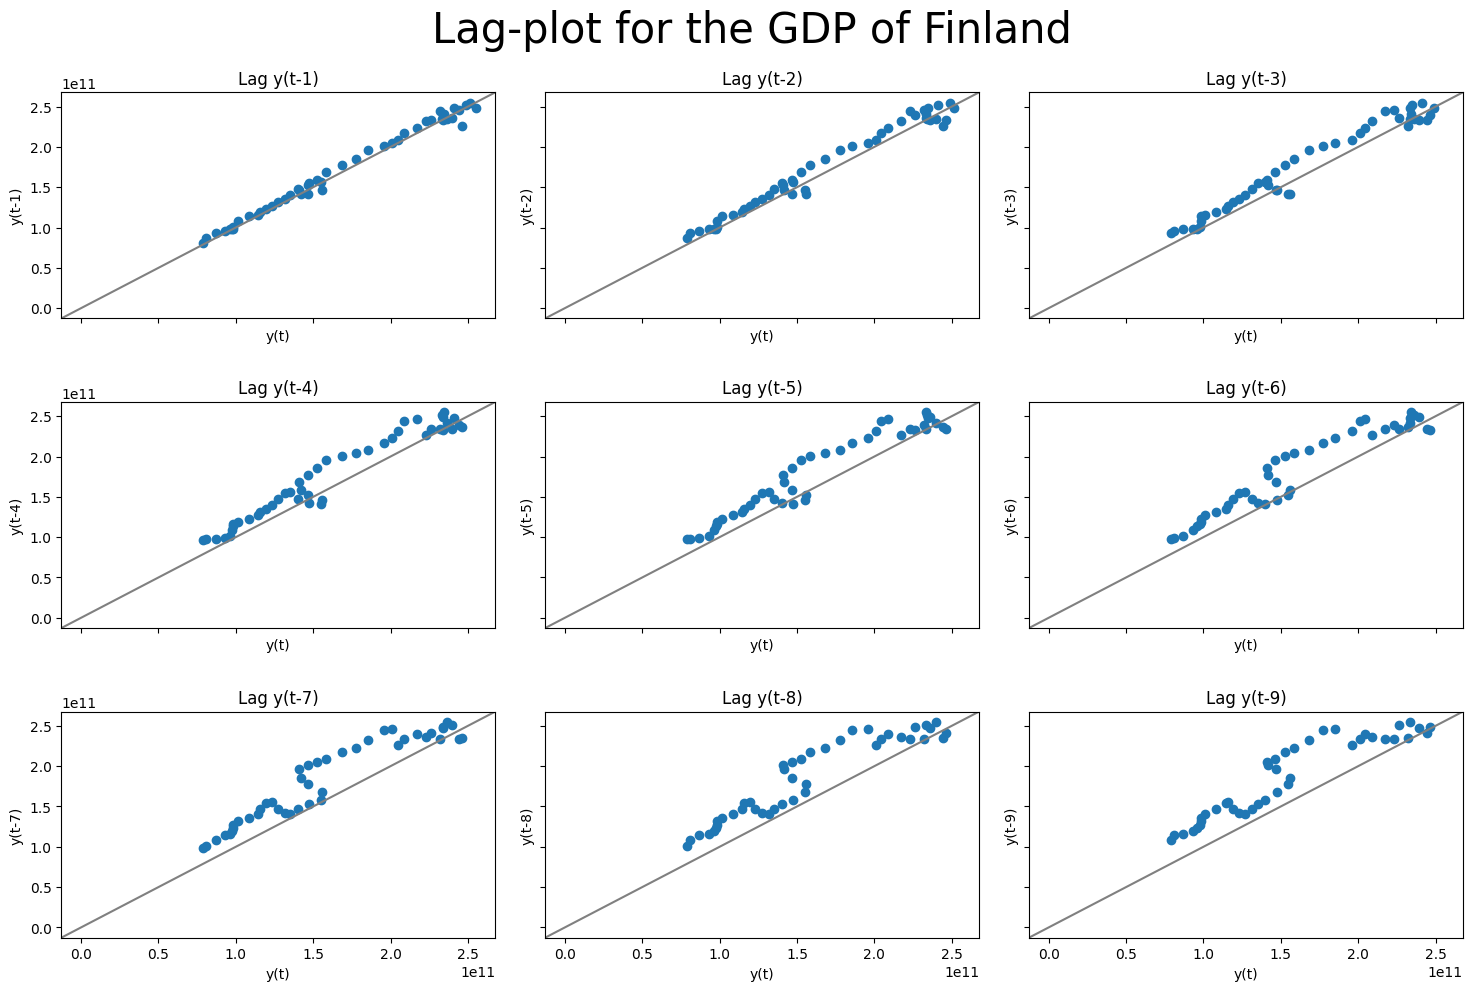

In [14]:
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(15,10))
fig.suptitle(f'Lag-plot for the GDP of {nation_list[0]}', fontsize = 30)
plt.tight_layout(pad = 2, h_pad = 5)

for i, ax in enumerate(axes.flatten()[:9]):
    pd.plotting.lag_plot(df_1['GDP'], lag = i+1, ax = ax)
    ax.set_xlabel('y(t)')
    ax.set_ylabel('y(t-'+str(i+1)+')')
    ax.set_title(f'Lag y(t-{str(i+1)})')
    pt = (350, 350)
    ax.axline(pt, slope=1, color='gray')



## Autocorrelation of GDP

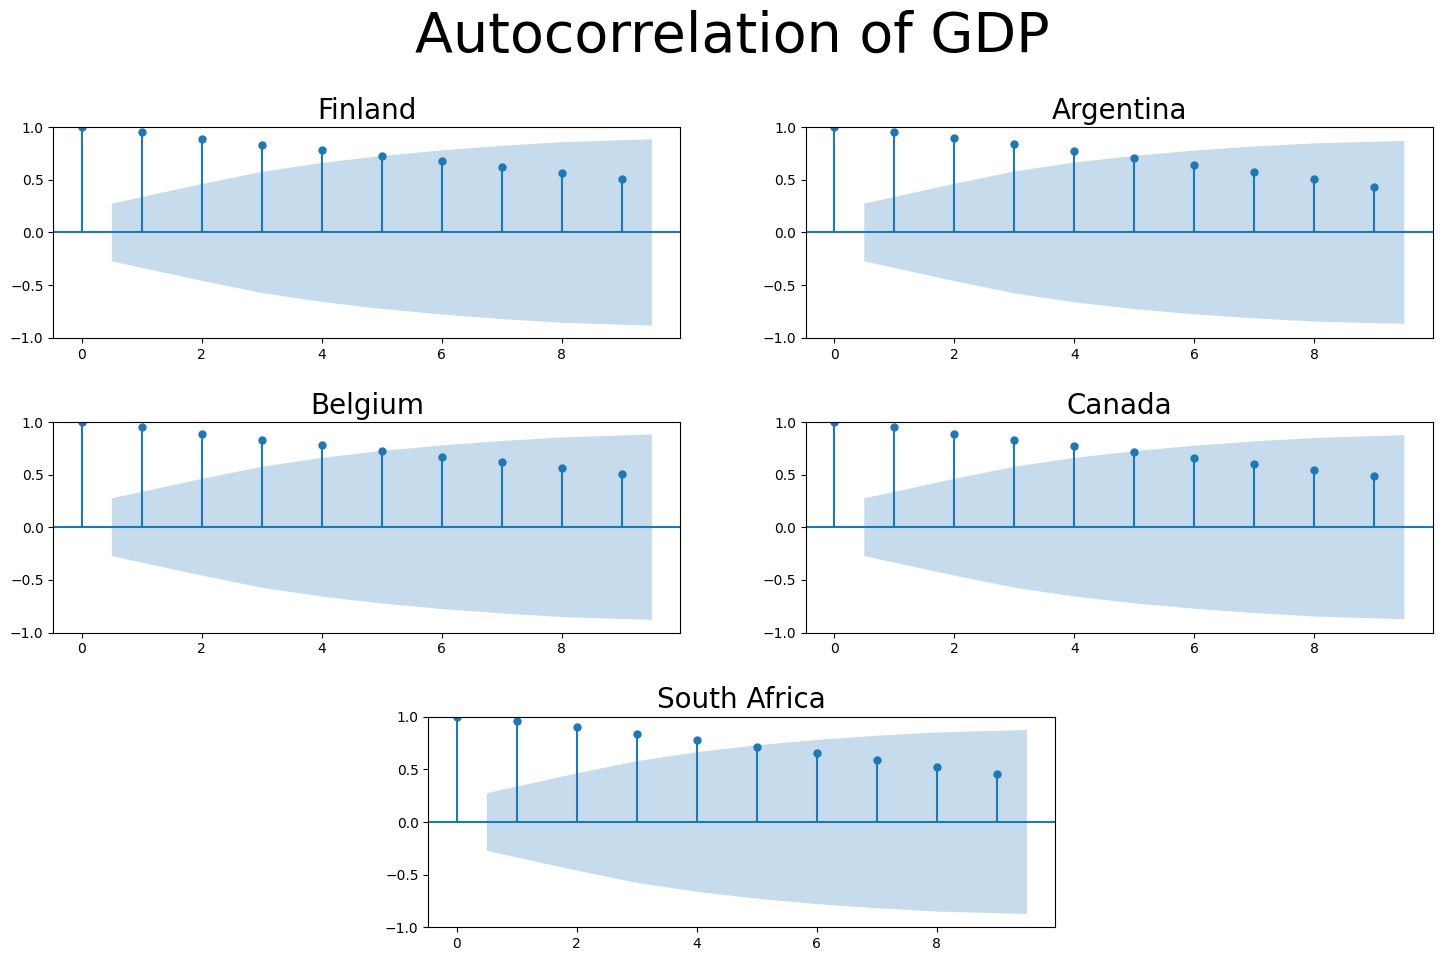

In [15]:
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
plt.suptitle('Autocorrelation of GDP', fontsize = 40)
plt.tight_layout(pad = 2.8, h_pad = 1.8)
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)

plot_acf(df_1['GDP'], lags = 9, ax = ax[0][0])
plot_acf(df_2['GDP'], lags = 9, ax = ax[0][1])
plot_acf(df_3['GDP'], lags = 9, ax = ax[1][0])
plot_acf(df_4['GDP'], lags = 9, ax = ax[1][1])
plot_acf(df_5['GDP'], lags = 9, ax = ax[2][0])

fig.delaxes(ax[2][1])

ax[0][0].set_title(nation_list[0], fontsize = 20)
ax[0][1].set_title(nation_list[1], fontsize = 20)
ax[1][0].set_title(nation_list[2], fontsize = 20)
ax[1][1].set_title(nation_list[3], fontsize = 20)
ax[2][0].set_title(nation_list[4], fontsize = 20)

pos = ax[2][0].get_position()
new_pos = [pos.x0 + 0.25, pos.y0, pos.width, pos.height]
ax[2][0].set_position(new_pos)

plt.show()

# 6. Split data in train and test 

In [16]:
df_train_test = {}

for idx, df in enumerate(df_list):
    df_train_test[nation_list[idx]] = f.train_test_split(df)

# 7. Frequency analysis

## Fast Fourier Transform

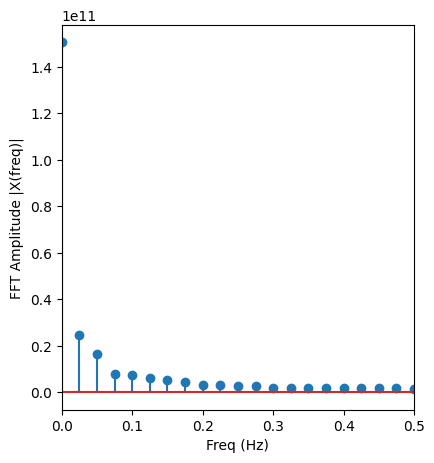

In [17]:
X = fft(df_train_test[nation_list[0]][0]['GDP'])
N = len(X)
Fs = 1
freq_step = Fs/N;
freq_vec = np.arange(0, Fs, freq_step)

plt.figure(figsize = (10, 5))
plt.subplot(121)

plt.stem(freq_vec, np.abs(X)/N)
plt.xlim(0, 0.5)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

## Power-spectral density

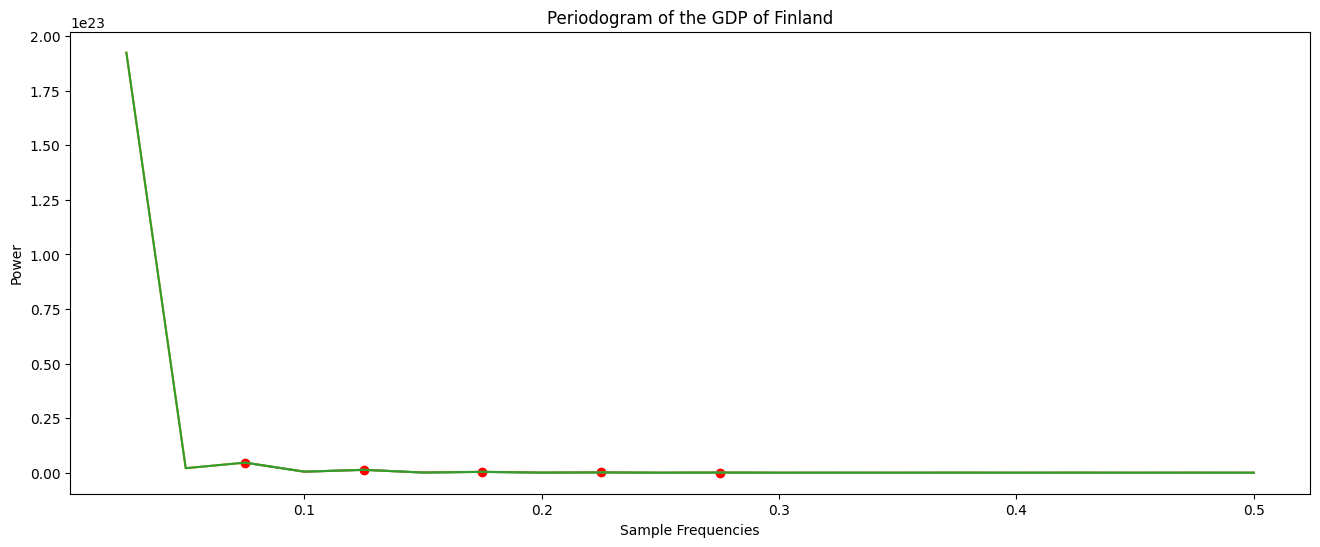

,Frequency,Density,Period
0,0.075,4.616394e+21,13.333333
1,0.125,1.323946e+21,8.000000
2,0.175,3.951268e+20,5.714286
3,0.225,1.510196e+20,4.444444
4,0.275,8.303045e+19,3.636364


----------------------------------------------


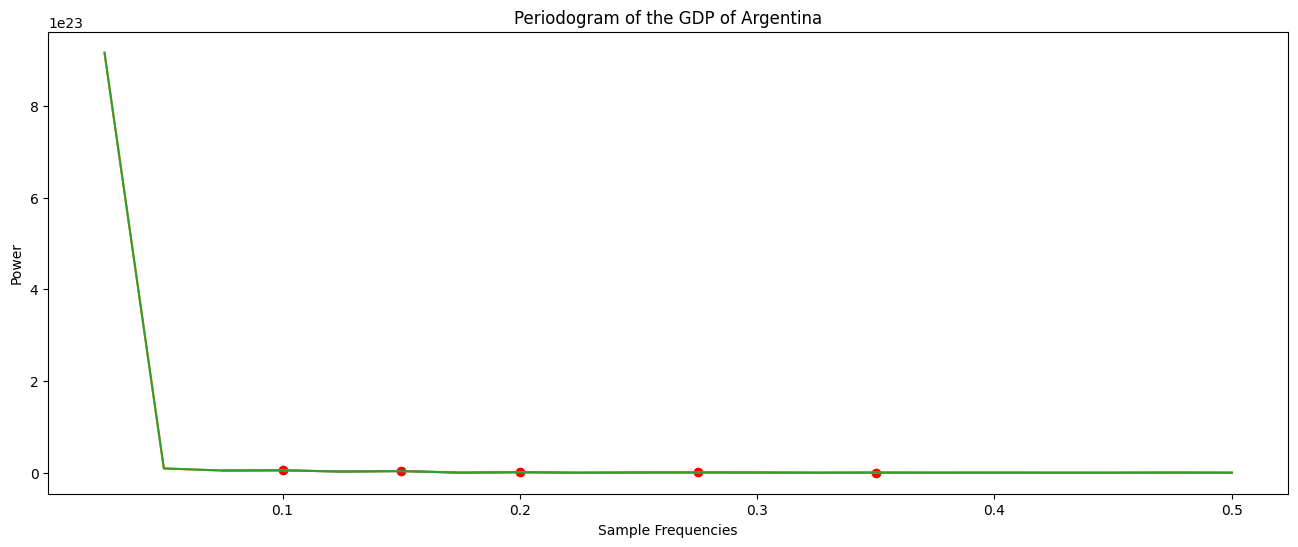

,Frequency,Density,Period
0,0.100,5.293598e+21,10.000000
1,0.150,3.597535e+21,6.666667
2,0.200,1.106188e+21,5.000000
3,0.275,6.324115e+20,3.636364
4,0.350,2.649296e+20,2.857143


----------------------------------------------


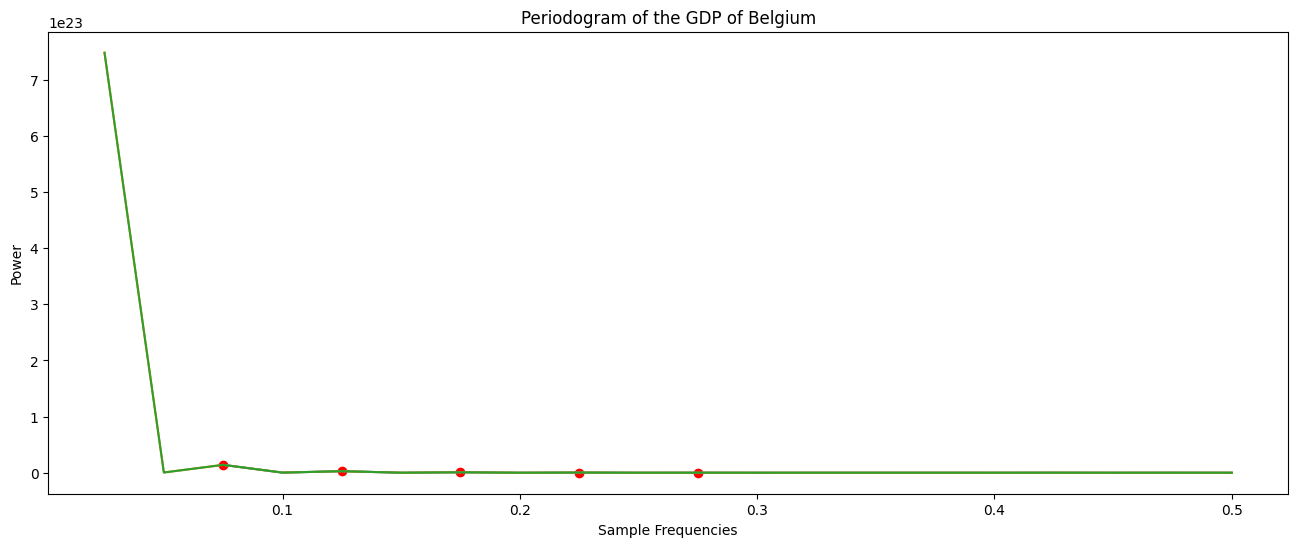

,Frequency,Density,Period
0,0.075,1.400916e+22,13.333333
1,0.125,2.737009e+21,8.000000
2,0.175,7.785270e+20,5.714286
3,0.225,3.089728e+20,4.444444
4,0.275,9.780574e+19,3.636364


----------------------------------------------


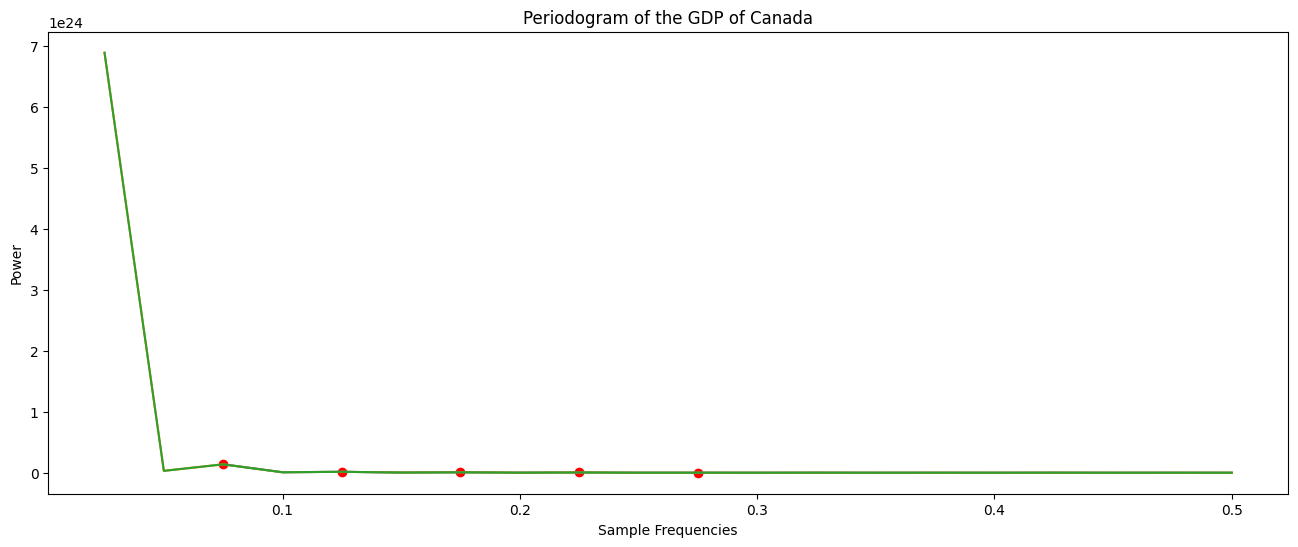

,Frequency,Density,Period
0,0.075,1.374548e+23,13.333333
1,0.125,1.512819e+22,8.000000
2,0.175,6.946460e+21,5.714286
3,0.225,4.345644e+21,4.444444
4,0.275,8.281410e+20,3.636364


----------------------------------------------


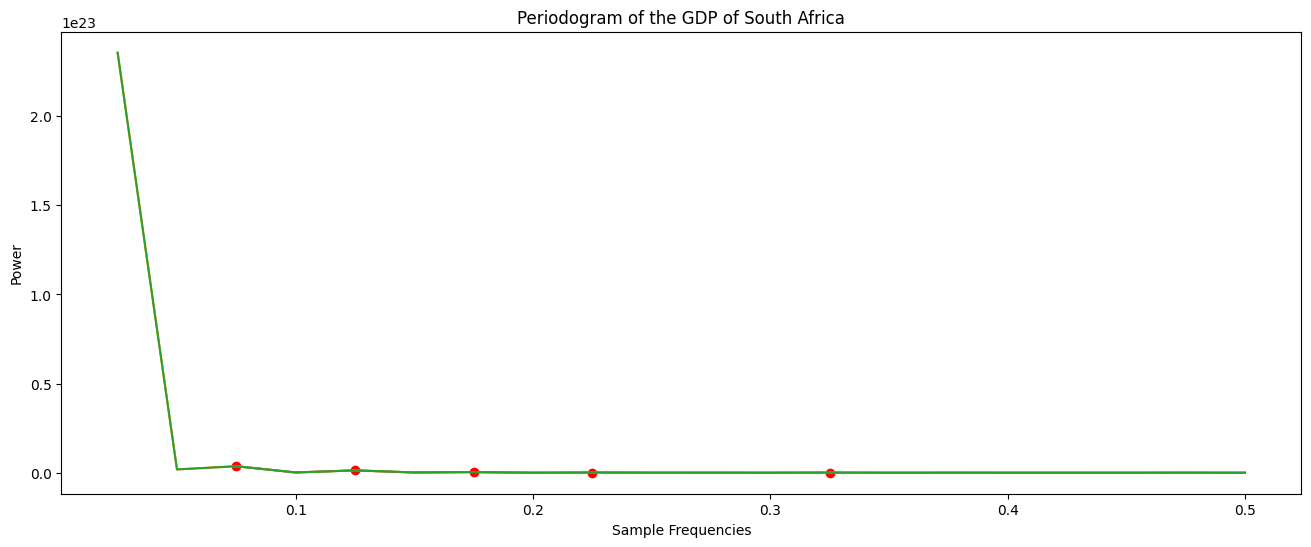

,Frequency,Density,Period
0,0.075,3.636201e+21,13.333333
1,0.125,1.309320e+21,8.000000
2,0.175,3.555564e+20,5.714286
3,0.225,1.198960e+20,4.444444
4,0.325,6.801610e+19,3.076923


----------------------------------------------


In [18]:
seasons_list = []

for nation in nation_list:
    top_season = f.spd(nation, df_train_test, Fs)
    seasons_list.append(top_season)
    print('----------------------------------------------')

seasons_list = [round(x) for x in seasons_list]

# 8. Stationarity check

## 8.1 Visual stationarity

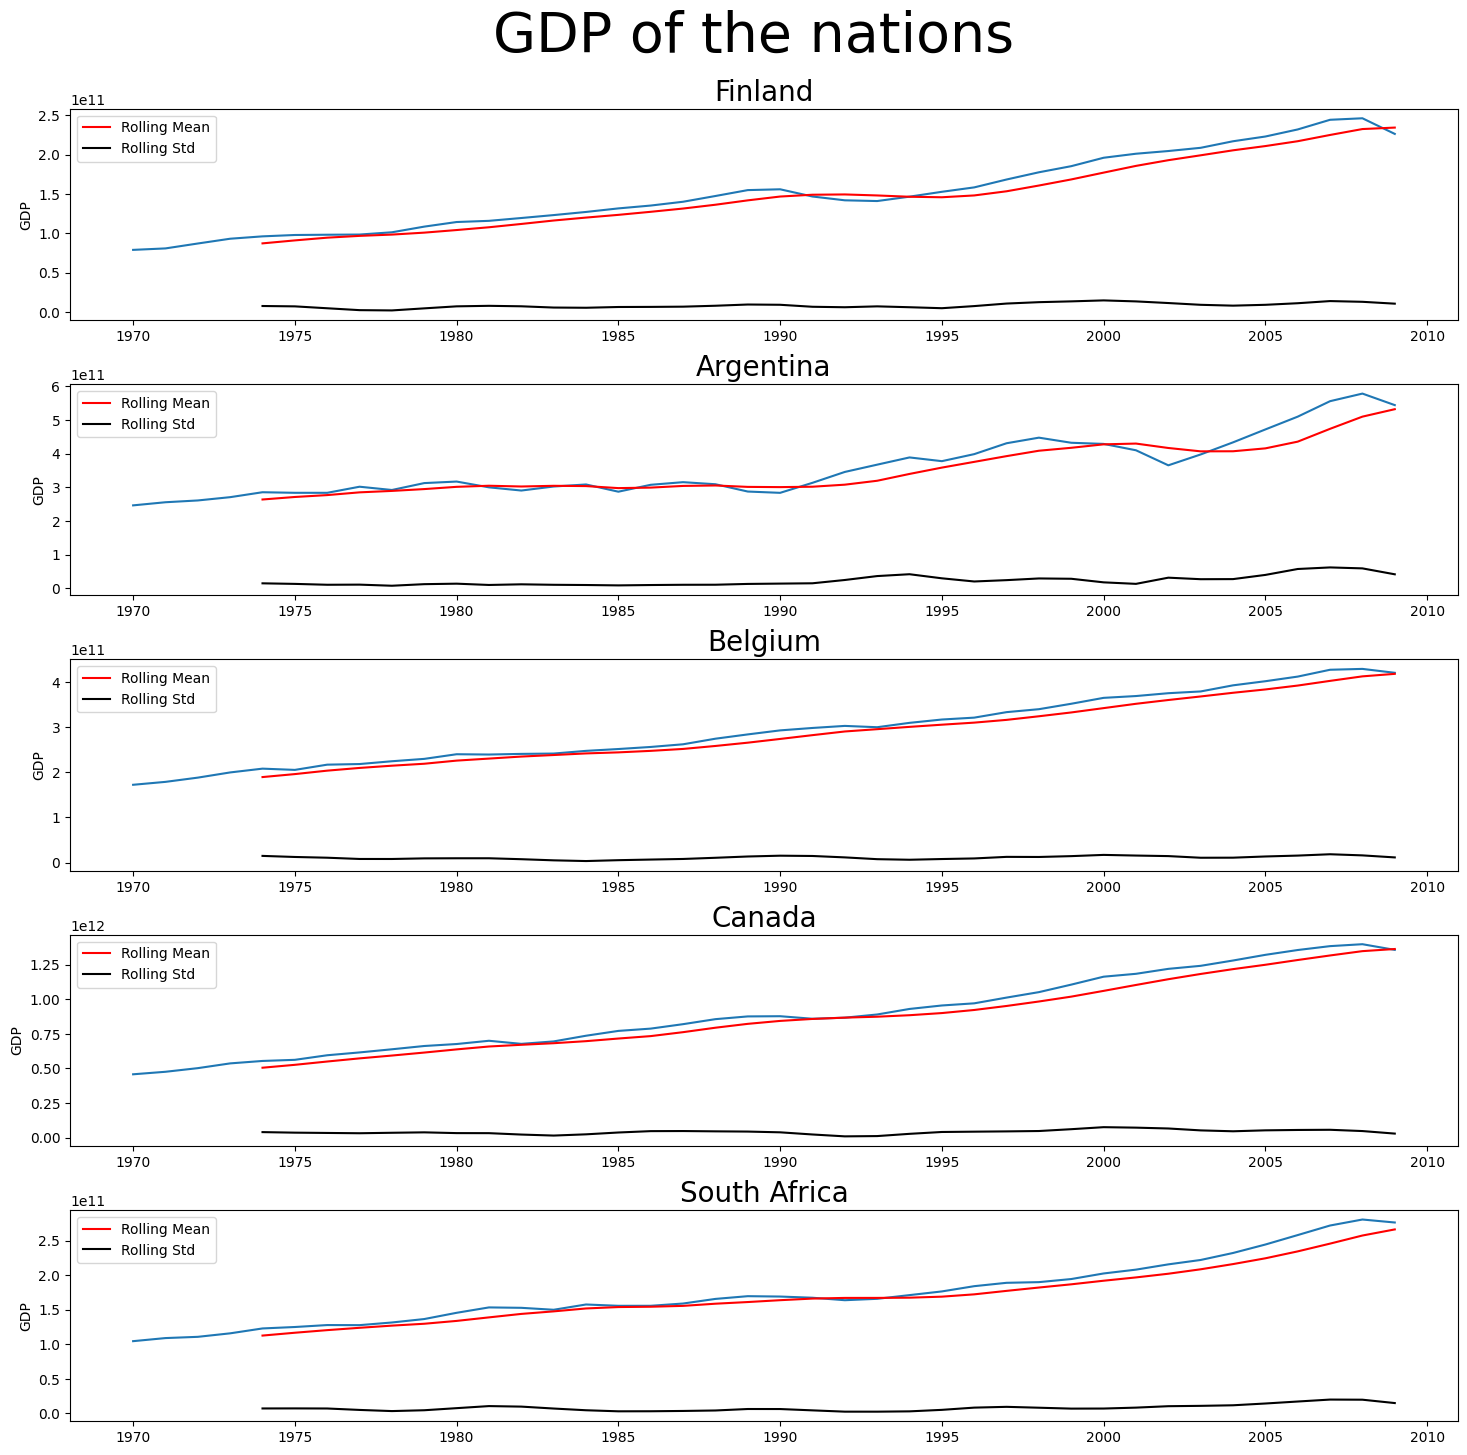

In [19]:
f.roll_mean_std_plot(df_train_test, nation_list, 5)

## 8.2 Statistics stationarity

In [20]:
f.check_stationarity(df_list, df_train_test, nation_list)

,ADF,P-value for ADF,ADF stationarity,KPSS,P-value for KPSS,KPSS stationarity
Finland,-0.466427,0.898403,No,0.871910,0.01,No
Argentina,1.126831,0.995439,No,0.819012,0.01,No
Belgium,0.165039,0.970231,No,0.899851,0.01,No
Canada,-0.599595,0.871074,No,0.887731,0.01,No
South Africa,0.716771,0.990167,No,0.857219,0.01,No


In [21]:
df_train_test_log = {}

df_train_test_log = f.log_transform(df_train_test)

print('Stationarity check after log transform')
f.check_stationarity(df_list, df_train_test_log, nation_list)

Stationarity check after log transform


,ADF,P-value for ADF,ADF stationarity,KPSS,P-value for KPSS,KPSS stationarity
Finland,-1.105531,0.712861,No,0.892171,0.01,No
Argentina,-0.624600,0.865326,No,0.845556,0.01,No
Belgium,-1.925523,0.320151,No,0.910632,0.01,No
Canada,-1.759204,0.400895,No,0.902088,0.01,No
South Africa,-0.236770,0.933994,No,0.885512,0.01,No


In [22]:
df_train_test_log_dif = {}

for idx, nation in enumerate(nation_list):
    df_train_test_log_dif[nation] = f.difference(df_train_test_log, seasons_list[idx], nation)
    print(f"Applied seasonal difference of {seasons_list[idx]} for {nation}'s GDP")

print('-----------')

print('Stationarity check after seasonal differencing transform')
f.check_stationarity(df_list, df_train_test_log_dif, nation_list)

Applied seasonal difference of 13 for Finland's GDP
Applied seasonal difference of 10 for Argentina's GDP
Applied seasonal difference of 13 for Belgium's GDP
Applied seasonal difference of 13 for Canada's GDP
Applied seasonal difference of 13 for South Africa's GDP
-----------
Stationarity check after seasonal differencing transform


,ADF,P-value for ADF,ADF stationarity,KPSS,P-value for KPSS,KPSS stationarity
Finland,-3.723992,0.003788,Yes,0.164088,0.1,Yes
Argentina,-2.382989,0.146595,No,0.311514,0.1,Yes
Belgium,-3.971897,0.001565,Yes,0.118105,0.1,Yes
Canada,-2.685215,0.076632,No,0.172177,0.1,Yes
South Africa,-2.296825,0.172994,No,0.256523,0.1,Yes


In [23]:
df_train_test_log_2dif = {}

for nation in nation_list:
    df_train_test_log_2dif[nation] = f.difference(df_train_test_log, 1, nation)

print('Stationarity check after first order differencing transform')
f.check_stationarity(df_list, df_train_test_log_2dif, nation_list)

Stationarity check after first order differencing transform


,ADF,P-value for ADF,ADF stationarity,KPSS,P-value for KPSS,KPSS stationarity
Finland,-3.806299,0.002844,Yes,0.121892,0.1,Yes
Argentina,-4.573650,0.000144,Yes,0.094365,0.1,Yes
Belgium,-5.284774,0.000006,Yes,0.251390,0.1,Yes
Canada,-3.653042,0.004824,Yes,0.277590,0.1,Yes
South Africa,-4.011000,0.001354,Yes,0.146746,0.1,Yes


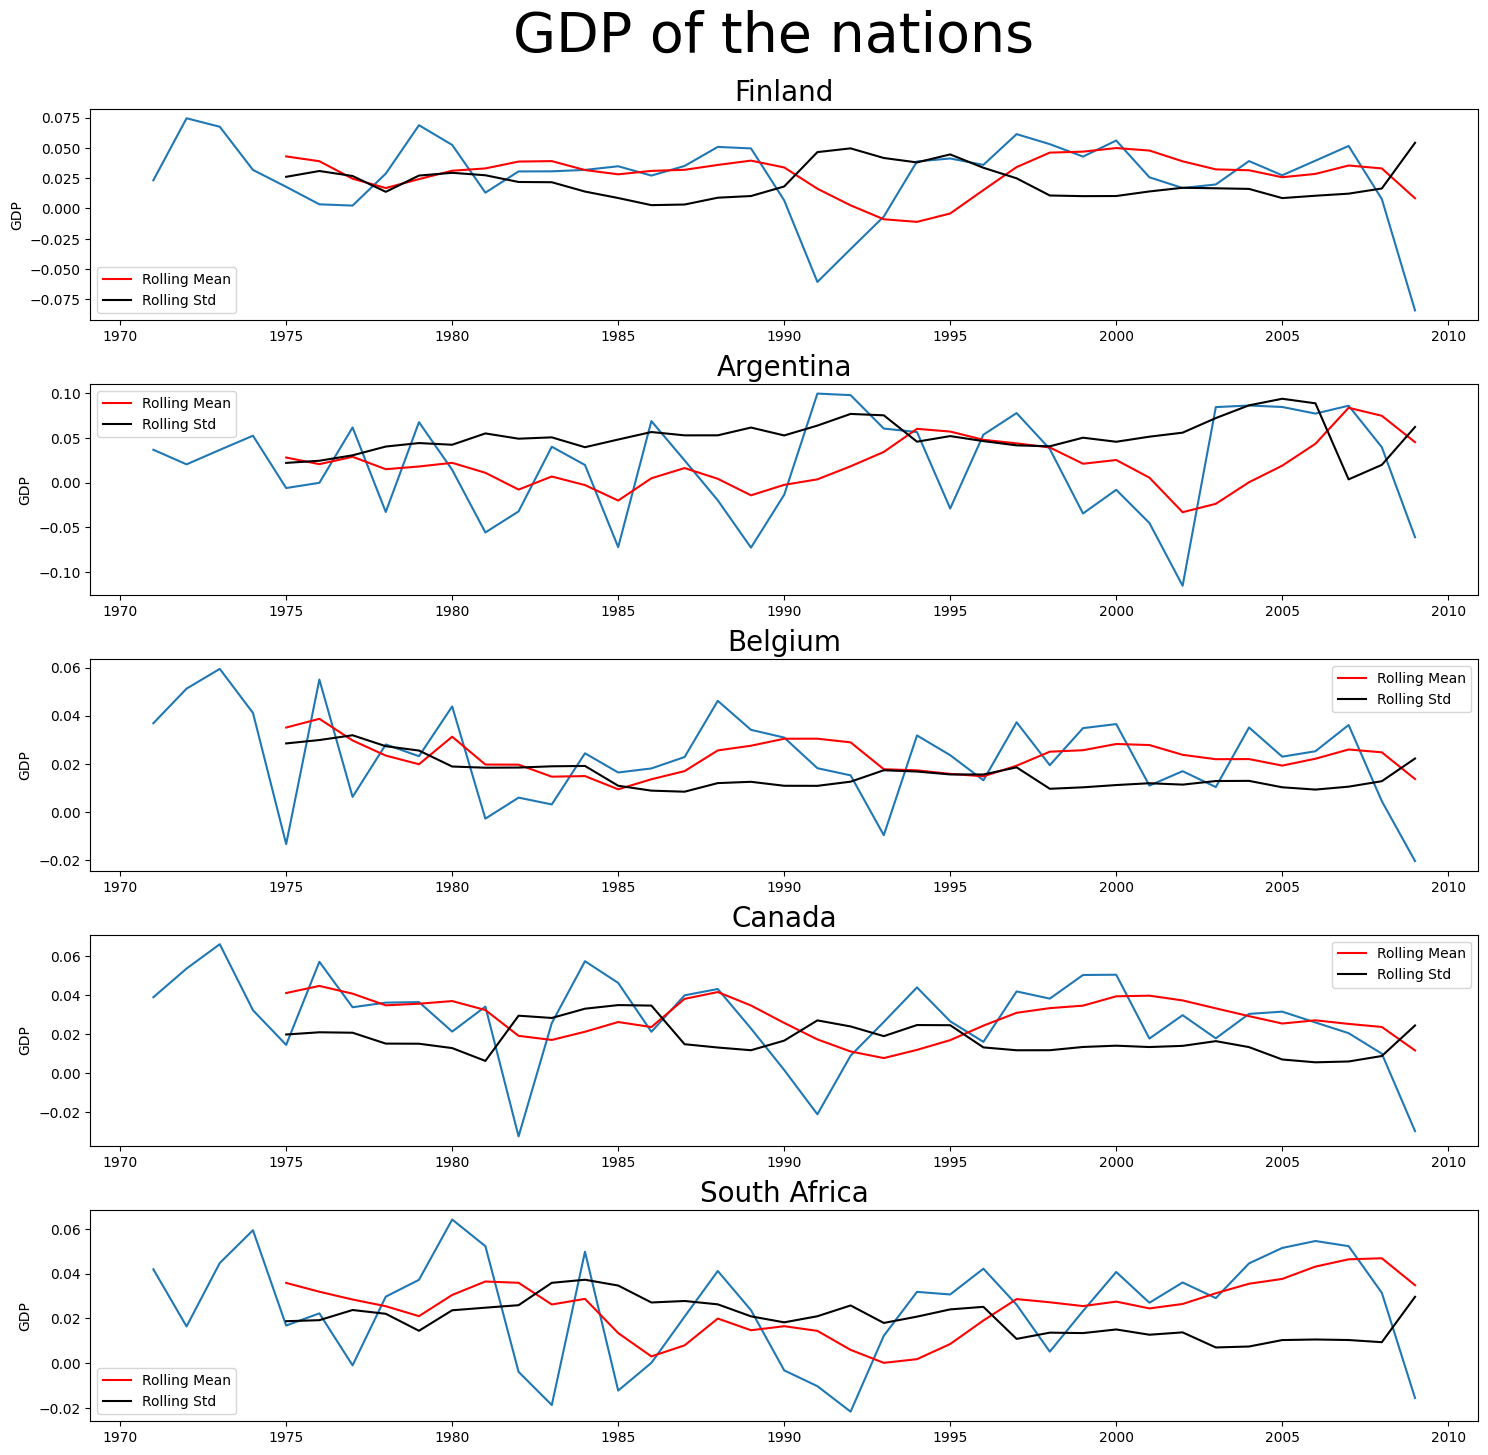

In [24]:
f.roll_mean_std_plot(df_train_test_log_2dif, nation_list, 5)

To achieve stationarity:
1. log transform
2. seasonal differencing
3. first order differencing